![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 1: kNN and Linear Regression

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 55

<hr style="height:2.4pt">

In [4]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [5]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [6]:
# Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part Β :  Multi-Linear Regression [25 points total] </h2><br />


### Problem Description: 

Analysis of publically available profiles on simplymarry.com to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the SimplyMarry.com site.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are unlikely to hide any deeply held cultural or sociological biases in order to be perceived as being politically correct. This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias.

This is a dataset designed to make you think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as do these biases reduce among more educated users, or more urban users?  

In [8]:
# Read the file named "Income_prediction.csv"

df = pd.read_csv('data/Income_prediction.csv')
df.head()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
3,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
4,30,0,62,72,29.032,2,2,1,1,0,1,1,1,3,1,2,0,5,1,3,20833,6


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 5:   Using Data science to learn more about Indian society  [15 points total]</b>
<br />
First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.
<br /><br />
Answer the below questions using plots & simple statistics
<br /><br />
**5.1** [2pt] Is there a gender-bias for income of participants?
<br /><br />
**5.2** [2pt] Is there a correlation between income and skin complexion?
<br /><br />
**5.3** [2pt] Is there a discernable trend in the incomes of participants from different regions/cities?
<br /><br />
**5.4** [1pt] Is there a clear trend between BMI and the income?
<br /><br />
**5.5** [2pt] Does the level of education show a clear trend with income?
<br /><br />
**5.6** [2pt] Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
<br /><br />
**5.7** [2pt] Is the income lower or high for those living in 'nuclear' families?
<br /><br />
**5.8** [2pt] Is being 'Manglik' negatively affect the income of participants?

### Solutions

### 5.1
#### Is there a gender-bias for income of participants? 

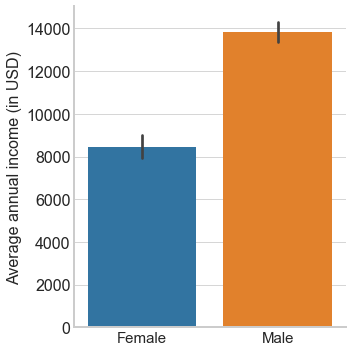

In [9]:
ax = sns.catplot(x="gender", y="income", kind="bar", data=df)
ax.set_xticklabels(['Female','Male'], fontsize=15)
ax.set(xlabel="", ylabel = "Average annual income (in USD)")
plt.tight_layout()

### 5.2
#### Is there a correlation between income and skin complexion?

In [104]:
corrMatrix = df[['complexion','income']].corr() 
print(corrMatrix)

            complexion  income
complexion       1.000  -0.086
income          -0.086   1.000


### 5.3
#### Is there a discernable trend in the incomes of participants from different regions/cities?

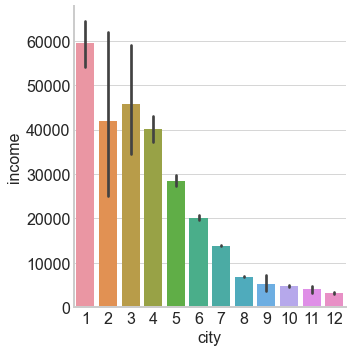

In [139]:
sns.catplot(x="city", y="income", kind="bar", data=df)
plt.tight_layout()

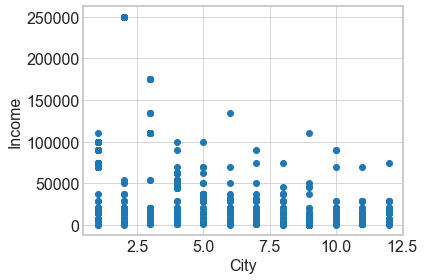

In [116]:
plt.scatter(df.city, df.income)
plt.xlabel('City')
plt.ylabel('Income')
plt.tight_layout()

### 5.4
#### Is there a clear trend between BMI and the income? 

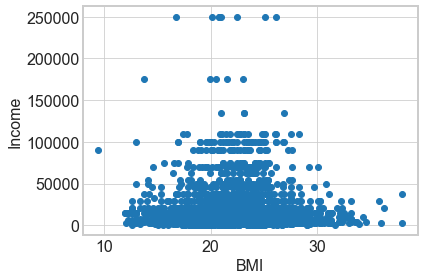

In [117]:
plt.scatter(df.bmi, df.income)
plt.xlabel('BMI')
plt.ylabel('Income')
plt.tight_layout()

### 5.5
#### Does the level of education show a clear trend with income? 

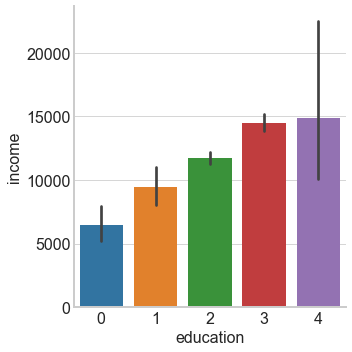

In [140]:
sns.catplot(x="education", y="income", kind="bar", data=df)
plt.tight_layout()

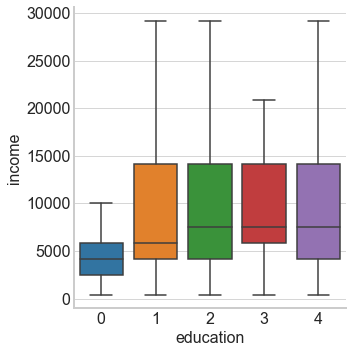

In [142]:
sns.catplot(x="education", y="income", kind="box", showfliers = False, data=df)
plt.tight_layout()

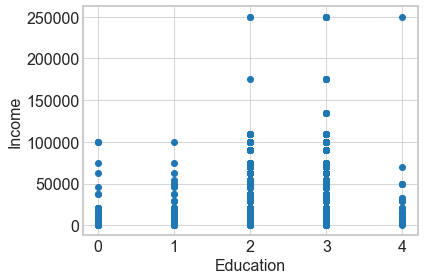

In [118]:
plt.scatter(df.education, df.income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.tight_layout()

### 5.6
#### Do any of the numeric attributes show a clear non-linear dependence with the amount of income?

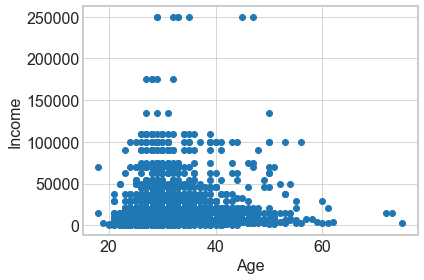

In [119]:
plt.scatter(df.age, df.income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()

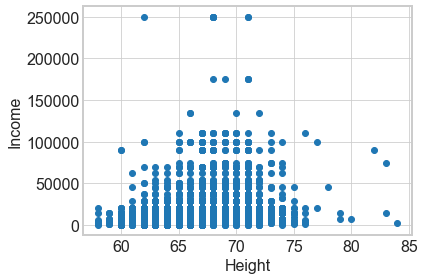

In [120]:
plt.scatter(df.height, df.income)
plt.xlabel('Height')
plt.ylabel('Income')
plt.tight_layout()

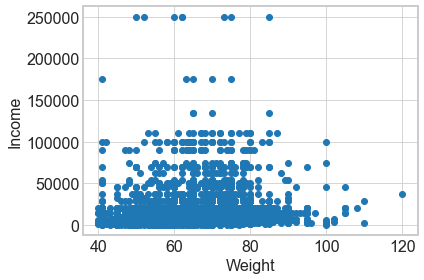

In [121]:
plt.scatter(df.kgs, df.income)
plt.xlabel('Weight')
plt.ylabel('Income')
plt.tight_layout()

### 5.7
#### Is the income lower or high for those living in 'nuclear' families? 

In [ ]:
# your code here


### 5.8
#### Is being 'Manglik' negatively affect the income of participants?

In [ ]:
# your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 6:  Calculate the Gini Index  [10 points total]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.
<br /><br />
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
<br /><br />
**6.2** Compare your gini index with other countries

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated gini index value for this dataset, what is your conclusion on the income disparity in the three countries?

### Solutions

### 6.1

In [ ]:
# your code here


### 6.2

In [ ]:
# your code here
